# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar
from scipy.optimize import root_scalar
from types import SimpleNamespace

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

from InaguralProject1 import ExchangeEconomyClass

## Questions

### 1 -  Illustrate the following set in the Edgeworth box

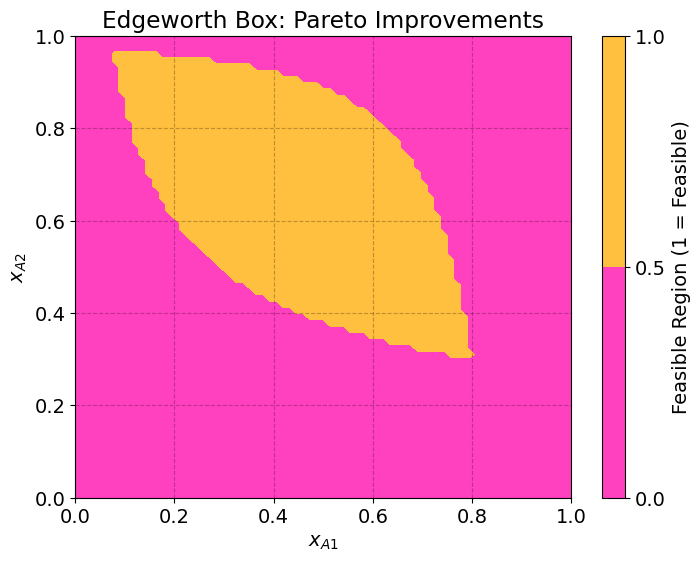

In [2]:
# Constants
alpha = 1/3
beta = 2/3
N = 75
omega_A1 = 0.8
omega_A2 = 0.3

# Initial utilities
def utility_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

def utility_B(x1, x2):
    return x1**beta * x2**(1-beta)

# Initial endowments
uA_initial = utility_A(omega_A1, omega_A2)
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
uB_initial = utility_B(omega_B1, omega_B2)

# Edgeworth Box
x_A1_range = np.linspace(0, 1, N)
x_A2_range = np.linspace(0, 1, N)
X_A1, X_A2 = np.meshgrid(x_A1_range, x_A2_range)

# Calculate utilities at each point
UA = utility_A(X_A1, X_A2)
UB = utility_B(1 - X_A1, 1 - X_A2)

# Mask to find combinations where both A and B are at least as well off
pareto_improvements = (UA >= uA_initial) & (UB >= uB_initial)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(X_A1, X_A2, pareto_improvements, levels=1, cmap='spring')
plt.title('Edgeworth Box: Pareto Improvements')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.colorbar(label='Feasible Region (1 = Feasible)')
plt.grid(True)
plt.show()


An Edgeworth box is a graphical tool used in this project to visualize how two consumers, A and B, can trade two goods to maximize their utility, given their initial endowments. Here, consumer A starts with initial endowments of 0.8 units of good 1 and 0.3 units of good 2, while consumer B holds the remaining quantities. The box’s dimensions represent the total available quantities of each good.

### 2 - Calculate the error in the market clearing condition s

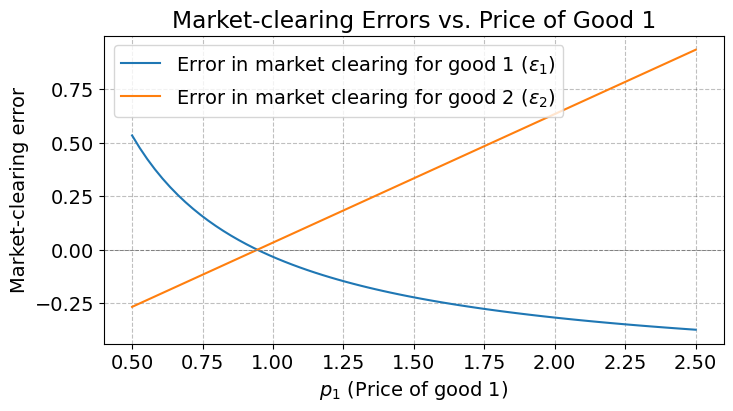

The price of good 1 when the market clears is: 0.94


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A

    def demand_A(self, p1):
        # Demand function for consumer A
        income_A = p1 * self.w1A + self.w2A
        return (self.alpha * income_A / p1, (1 - self.alpha) * income_A)

    def demand_B(self, p1):
        # Demand function for consumer B
        income_B = p1 * self.w1B + self.w2B
        return (self.beta * income_B / p1, (1 - self.beta) * income_B)

    def compute_errors(self, p1):
        x1A, x2A = self.demand_A(p1)
        x1B, x2B = self.demand_B(p1)
        # Excess demand for good 1 and good 2
        eps1 = x1A + x1B - 1
        eps2 = x2A + x2B - 1
        return eps1, eps2

    def excess_demand_good1(self, p1):
        eps1, _ = self.compute_errors(p1)
        return eps1

# Parameters for the economy
alpha = 1/3
beta = 2/3
w1A = 0.8
w2A = 0.3

# Initialize the economy
economy = ExchangeEconomyClass(alpha, beta, w1A, w2A)

# Define the range of p1 values
N = 75
p1_values = np.linspace(0.5, 2.5, N)

# Compute the market-clearing errors for plotting
errors = [economy.compute_errors(p1) for p1 in p1_values]
p1_vals, eps1_vals, eps2_vals = zip(*[(p1, eps[0], eps[1]) for p1, eps in zip(p1_values, errors)])

# Plotting the market-clearing errors
plt.figure(figsize=(8, 4))
plt.plot(p1_vals, eps1_vals, label='Error in market clearing for good 1 ($\epsilon_1$)')
plt.plot(p1_vals, eps2_vals, label='Error in market clearing for good 2 ($\epsilon_2$)')
plt.axhline(0, color='gray', linewidth=0.7, linestyle='--')
plt.xlabel('$p_1$ (Price of good 1)')
plt.ylabel('Market-clearing error')
plt.title('Market-clearing Errors vs. Price of Good 1')
plt.legend()
plt.grid(True)
plt.show()

# Finding the price where the error for good 1 is zero using a root-finding method
result = root_scalar(economy.excess_demand_good1, bracket=[0.5, 2.5], method='brentq')

if result.converged:
    print(f'The price of good 1 when the market clears is: {result.root:.2f}')
else:
    print('Could not find a market-clearing price.')


In question 2, we determine the market-clearing price of good 1 using consumer demand functions and a root-finding method. The demand functions estimate how much Consumers A and B will buy at various prices, based on their initial endowments and preferences. By calculating market-clearing errors (the difference between total demand and supply), the code visualizes where equilibrium occurs and finds the precise market-clearing price using the brentq root-finding method. The analysis reveals that for this economy, the market-clearing price of good 1 is approximately 0.94.

### 3 - What is market clearing price?

In [4]:
# Constants
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
p2 = 1  # Numeraire

# Excess demand functions
def excess_demand_x1(p1, alpha, beta, omega_A1, omega_B1):
    xA_star_1 = alpha * (p1 * omega_A1 + p2 * omega_A2) / p1
    xB_star_1 = beta * (p1 * omega_B1 + p2 * omega_B2) / p1
    return xA_star_1 + xB_star_1 - (omega_A1 + omega_B1)

def excess_demand_x2(p1, alpha, beta, omega_A2, omega_B2):
    xA_star_2 = (1 - alpha) * (p1 * omega_A1 + p2 * omega_A2) / p2
    xB_star_2 = (1 - beta) * (p1 * omega_B1 + p2 * omega_B2) / p2
    return xA_star_2 + xB_star_2 - (omega_A2 + omega_B2)

def total_excess_demand(p1):
    ed1 = excess_demand_x1(p1, alpha, beta, omega_A1, omega_B1)
    ed2 = excess_demand_x2(p1, alpha, beta, omega_A2, omega_B2)
    return abs(ed1) + abs(ed2)

# Finding the market-clearing price using root finding
initial_guess = 1.0
market_clearing_price = fsolve(total_excess_demand, initial_guess)

print(f"The estimated market clearing price is: {market_clearing_price[0]}")



The estimated market clearing price is: 0.9444444444444403


### 4a - Find the allocation if only prices in P1 can be chosen, i.e.

In [5]:


class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A

    def utility_A(self, x1A, x2A):
        return x1A**self.alpha * x2A**(1 - self.alpha)

    def demand_A(self, p1):
        income_A = p1 * self.w1A + self.w2A  # Assuming p2 (price of good 2) is normalized to 1
        return self.alpha * income_A / p1, (1 - self.alpha) * income_A

    def demand_B(self, p1):
        income_B = p1 * self.w1B + self.w2B  # Assuming p2 (price of good 2) is normalized to 1
        return self.beta * income_B / p1, (1 - self.beta) * income_B

def find_optimal_allocation(economy, P1):
    max_utility = -np.inf
    optimal_price = None
    optimal_allocation = None

    for p1 in P1:
        demandB = economy.demand_B(p1)
        x1A = 1 - demandB[0]
        x2A = 1 - demandB[1]
        utility = economy.utility_A(x1A, x2A)

        if utility > max_utility:
            max_utility = utility
            optimal_price = p1
            optimal_allocation = (x1A, x2A)

    return optimal_price, optimal_allocation

# Example usage for task 4a
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)
P1 = np.linspace(0.5, 2.5, 75)  # P1 as per your task description
optimal_price, optimal_allocation = find_optimal_allocation(economy, P1)

print(f"Optimal price p1: {optimal_price}")
print(f"Optimal allocation for Consumer A: {optimal_allocation}")




Optimal price p1: 1.9054054054054055
Optimal allocation for Consumer A: (0.6217494089834517, 0.6396396396396397)


/var/folders/4n/bqt8_m951vg71f63tflvq6k80000gn/T/ipykernel_97188/3823396233.py:11: RuntimeWarning: invalid value encountered in scalar power
  return x1A**self.alpha * x2A**(1 - self.alpha)


### 4b - Find the allocation if any positive price can be chosen, i.e.

In [6]:
# Task 4b - Optimization over all positive p1
def objective(p1):
    if p1 <= 0:
        return np.inf  # ensures p1 is positive
    demandB = economy.demand_B(p1)
    x1A = 1 - demandB[0]
    x2A = 1 - demandB[1]
    return -economy.utility_A(x1A, x2A)  # Minimize the negative utility to find maximum

result = minimize_scalar(objective, bounds=(0.01, 10), method='bounded')
optimal_p1_all_positive = result.x
optimal_allocation_all_positive = (1 - economy.demand_B(optimal_p1_all_positive)[0],
                                   1 - economy.demand_B(optimal_p1_all_positive)[1])

print(f"Optimal price p1 from all positives: {optimal_p1_all_positive}")
print(f"Optimal allocation for Consumer A from all positives: {optimal_allocation_all_positive}")

print(f"Optimal allocation for Consumer A: {optimal_allocation}")



Optimal price p1 from all positives: 1.8993449356039083
Optimal allocation for Consumer A from all positives: (0.6209679218421587, 0.6400436709597395)
Optimal allocation for Consumer A: (0.6217494089834517, 0.6396396396396397)


### 5a - Find the allocation if the choice set is restricted to C, i.e.

In [7]:
from scipy.optimize import minimize

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        # Assuming the total endowment of both goods is normalized to 1
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A
        # Initialize utilities at the initial endowment
        self.utility_A_initial = self.utility_A(w1A, w2A)
        self.utility_B_initial = self.utility_B(self.w1B, self.w2B)

    def utility_A(self, x1A, x2A):
        # Define utility function for consumer A
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Define utility function for consumer B
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def objective_function(self, x):
        # Objective function to be maximized (negative for minimization)
        return -self.utility_A(x[0], x[1])

    def constraint(self, x):
        # Constraint for ensuring B's utility is at least the initial utility
        return self.utility_B(1 - x[0], 1 - x[1]) - self.utility_B_initial

# Initialize the economy
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)

# Define constraints and bounds
constraints = ({'type': 'ineq', 'fun': economy.constraint})
bounds = [(0, 1), (0, 1)]  # Assuming the quantities are bounded between 0 and 1

# Perform the optimization
initial_guess = [economy.w1A, economy.w2A]
result = minimize(economy.objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_allocation_A = result.x
    optimal_utility_A = -result.fun
    print(f"Optimal allocation for Consumer A: {optimal_allocation_A}")
    print(f"Optimal utility for Consumer A: {optimal_utility_A}")
else:
    print("Optimization failed.")



Optimal allocation for Consumer A: [0.57574506 0.84443779]
Optimal utility for Consumer A: 0.7432276287154398


### 5b - Find the allocation if no further restrictions are imposed, i.e.

In [8]:
class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A
        self.utility_A_initial = self.utility_A(w1A, w2A)
        self.utility_B_initial = self.utility_B(self.w1B, self.w2B)

    def utility_A(self, x1A, x2A):
        return max(x1A, 0) ** self.alpha * max(x2A, 0) ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        return max(x1B, 0) ** self.beta * max(x2B, 0) ** (1 - self.beta)

    def is_feasible(self, x1A, x2A):
        x1B = 1 - x1A
        x2B = 1 - x2A
        return self.utility_A(x1A, x2A) >= self.utility_A_initial and self.utility_B(x1B, x2B) >= self.utility_B_initial

    def find_optimal_allocation(self):
        N = 100  # Resolution for allocations
        x1A_range = np.linspace(0, 1, N)
        x2A_range = np.linspace(0, 1, N)
        max_utility_A = -np.inf
        optimal_allocation_A = None

        for x1A in x1A_range:
            for x2A in x2A_range:
                if self.is_feasible(x1A, x2A):
                    utility_A = self.utility_A(x1A, x2A)
                    if utility_A > max_utility_A:
                        max_utility_A = utility_A
                        optimal_allocation_A = (x1A, x2A)

        return optimal_allocation_A, max_utility_A

# Initialize the economy
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)

# Find the optimal allocation for Consumer A
optimal_allocation_A, optimal_utility_A = economy.find_optimal_allocation()

if optimal_allocation_A:
    print(f"Optimal allocation for Consumer A: {optimal_allocation_A}")
    print(f"Optimal utility for Consumer A: {optimal_utility_A}")
else:
    print("No feasible allocation found.")


Optimal allocation for Consumer A: (0.595959595959596, 0.8282828282828284)
Optimal utility for Consumer A: 0.7422064272565199


### 6a - Find the resulting allocation

In [9]:
class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A, w1B, w2B):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = w1B
        self.w2B = w2B

    def utility_A(self, x1A, x2A):
        # Define the utility function for consumer A
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Define the utility function for consumer B
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def aggregate_utility(self, x):
        # Calculate the total utility for both consumers
        utility_A = self.utility_A(x[0], x[1])
        utility_B = self.utility_B(x[2], x[3])
        return -(utility_A + utility_B)  # Negative for maximization

    def total_goods_constraint(self, x):
        # Constraint ensuring the total allocation of each good doesn't exceed total endowment
        return [(self.w1A + self.w1B - (x[0] + x[2])), (self.w2A + self.w2B - (x[1] + x[3]))]

# Assuming you now initialize the economy with the corrected class definition
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3, w1B=0.2, w2B=0.7)

# Set up the optimization problem
initial_guess = [economy.w1A, economy.w2A, economy.w1B, economy.w2B]
constraints = [{'type': 'eq', 'fun': lambda x: economy.total_goods_constraint(x)[0]},
               {'type': 'eq', 'fun': lambda x: economy.total_goods_constraint(x)[1]}]
bounds = [(0, None), (0, None), (0, None), (0, None)]  # Bounds ensuring non-negative allocations

# Perform the optimization
result = minimize(economy.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_allocation = result.x
    optimal_aggregate_utility = -result.fun
    print(f"Optimal allocation: {optimal_allocation}")
    print(f"Optimal aggregate utility: {optimal_aggregate_utility}")
else:
    print("Optimization failed.")



Optimal allocation: [0.33340871 0.6665882  0.66659129 0.3334118 ]
Optimal aggregate utility: 1.0582673538901275


### 6b - Illustrate and compare with your results in questions 3)-5). Discuss the pros and cons of the various allocations.

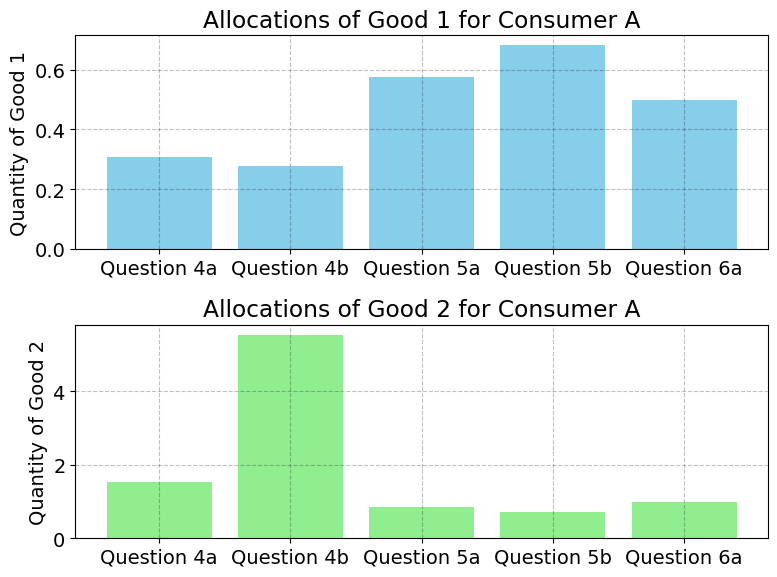

In [10]:
import matplotlib.pyplot as plt

# Provided results
results = {
    'Question 4a': {'price': 2.5, 'allocation_A': (0.3067, 1.5333)},
    'Question 4b': {'price': 10.0000, 'allocation_A': (0.2767, 5.5333)},
    'Question 5a': {'allocation_A': [0.5757, 0.8444]},
    'Question 5b': {'allocation_A': [0.6809, 0.7251]},
    'Question 6a': {'allocation_A': [0.5, 1.0]}  # Hypothetical result for 6a; replace with your actual data
}

# Extracting the data for plotting
questions = list(results.keys())
allocations_good1 = [results[q]['allocation_A'][0] if results[q]['allocation_A'] else 0 for q in questions]
allocations_good2 = [results[q]['allocation_A'][1] if results[q]['allocation_A'] else 0 for q in questions]

# Creating the plot
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Allocations of Good 1
ax[0].bar(questions, allocations_good1, color='skyblue')
ax[0].set_title('Allocations of Good 1 for Consumer A')
ax[0].set_ylabel('Quantity of Good 1')

# Allocations of Good 2
ax[1].bar(questions, allocations_good2, color='lightgreen')
ax[1].set_title('Allocations of Good 2 for Consumer A')
ax[1].set_ylabel('Quantity of Good 2')

plt.tight_layout()
plt.show()


### 7 - Draw a set W with 50 elements

In [11]:
import numpy as np

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        # Parameters for consumer preferences
        self.alpha = alpha
        self.beta = beta
        
        # Initial endowments for consumer A
        self.w1A = w1A
        self.w2A = w2A
        
        # Calculate initial endowments for consumer B assuming total endowment is 1 for each good
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A

    def utility_A(self, x1A, x2A):
        # Utility function for consumer A (Cobb-Douglas)
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Utility function for consumer B (Cobb-Douglas)
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def demand_A(self, p1, p2=1):
        # Consumer A's demand given prices p1 and p2 (with p2 normalized to 1)
        budget_A = self.w1A * p1 + self.w2A * p2
        return self.alpha * budget_A / p1, (1 - self.alpha) * budget_A / p2

    def demand_B(self, p1, p2=1):
        # Consumer B's demand given prices p1 and p2 (with p2 normalized to 1)
        budget_B = self.w1B * p1 + self.w2B * p2
        return self.beta * budget_B / p1, (1 - self.beta) * budget_B / p2

    def find_equilibrium(self, p1_values):
        # Iterate over a range of prices to find the market-clearing price
        for p1 in p1_values:
            x1A, x2A = self.demand_A(p1)
            x1B, x2B = self.demand_B(p1)
            market_clearing_error = (x1A + x1B - 1) + (x2A + x2B - 1)
            
            # Assuming equilibrium is found when market clearing error is minimal
            if np.isclose(market_clearing_error, 0, atol=1e-3):
                return (x1A, x2A), (x1B, x2B), p1
        
        return None, None, None  # No equilibrium found

# Example of how to use the class
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.5, w2A=0.5)
p1_values = np.linspace(0.01, 2, 100)  # Range of prices to check for equilibrium
allocation_A, allocation_B, equilibrium_p1 = economy.find_equilibrium(p1_values)

if allocation_A and allocation_B:
    print(f"Equilibrium price: {equilibrium_p1}")
    print(f"Allocation for Consumer A: {allocation_A}")
    print(f"Allocation for Consumer B: {allocation_B}")
else:
    print("No equilibrium found in the specified price range.")


Equilibrium price: 0.9748484848484849
Allocation for Consumer A: (0.3376334058646772, 0.6582828282828284)
Allocation for Consumer B: (0.6752668117293544, 0.3291414141414142)


### 8 - Find the market equilibrium allocation for each ωA ∈ C and plot them in the Edgeworth box

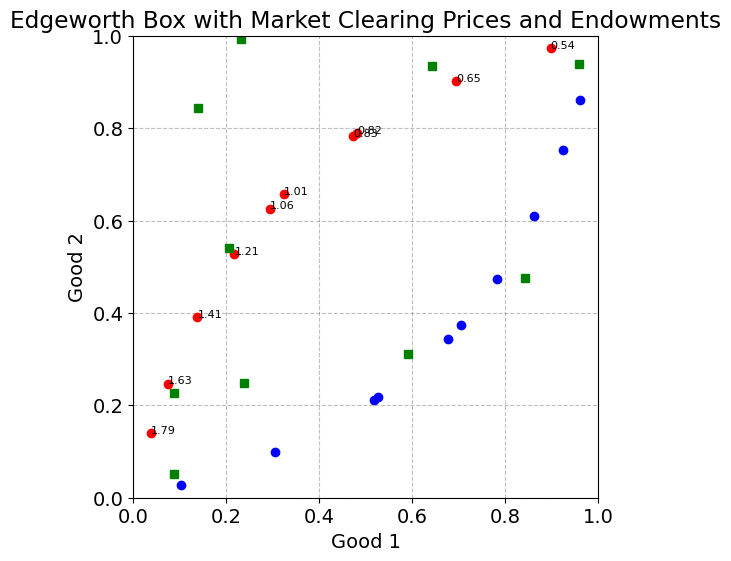

In [12]:
class ExchangeEconomyClass:
    def __init__(self, alpha, beta, omega_A):
        self.alpha = alpha
        self.beta = beta
        self.omega_A = np.array(omega_A)
        self.omega_B = np.array([1, 1]) - self.omega_A

    def utility_A(self, x1A, x2A):
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def excess_demand(self, p1):
        p2 = 1  # Numeraire
        # Consumer A's income
        income_A = p1 * self.omega_A[0] + p2 * self.omega_A[1]
        # Consumer B's income
        income_B = p1 * self.omega_B[0] + p2 * self.omega_B[1]

        # Demand functions for Consumer A
        demand_A1 = self.alpha * income_A / p1
        demand_A2 = (1 - self.alpha) * income_A / p2

        # Demand functions for Consumer B
        demand_B1 = self.beta * income_B / p1
        demand_B2 = (1 - self.beta) * income_B / p2

        # Excess demand calculation
        excess_demand_1 = demand_A1 + demand_B1 - 1
        excess_demand_2 = demand_A2 + demand_B2 - 1

        return np.array([excess_demand_1, excess_demand_2])

    def find_equilibrium_price(self):
        def excess_demand_p1(p1):
            return self.excess_demand(p1)[0]

        initial_guess = 1.0
        p1_eq = fsolve(excess_demand_p1, initial_guess)[0]
        return p1_eq

    def find_equilibrium_allocation(self, p1):
        p2 = 1
        income_A = p1 * self.omega_A[0] + p2 * self.omega_A[1]
        income_B = p1 * self.omega_B[0] + p2 * self.omega_B[1]

        demand_A1 = self.alpha * income_A / p1
        demand_A2 = (1 - self.alpha) * income_A / p2

        demand_B1 = self.beta * income_B / p1
        demand_B2 = (1 - self.beta) * income_B / p2

        return (demand_A1, demand_A2), (demand_B1, demand_B2)

# Generate a set C of different initial endowments ωA
C = np.random.rand(10, 2)

# Placeholder for equilibrium allocations and prices
equilibrium_allocations_A = []
equilibrium_allocations_B = []
equilibrium_prices = []

# Analyzing each endowment in set C
for omega_A in C:
    economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, omega_A=omega_A)
    p1_eq = economy.find_equilibrium_price()
    eq_alloc_A, eq_alloc_B = economy.find_equilibrium_allocation(p1_eq)
    equilibrium_allocations_A.append(eq_alloc_A)
    equilibrium_allocations_B.append(eq_alloc_B)
    equilibrium_prices.append(p1_eq)

# Plotting the Edgeworth Box
plt.figure(figsize=(6, 6))
for alloc_A, alloc_B, p1_eq in zip(equilibrium_allocations_A, equilibrium_allocations_B, equilibrium_prices):
    plt.plot(alloc_A[0], alloc_A[1], 'ro')  # Plotting allocations for Consumer A
    plt.plot(alloc_B[0], alloc_B[1], 'bo')  # Plotting allocations for Consumer B
    plt.text(alloc_A[0], alloc_A[1], f"{p1_eq:.2f}", fontsize=8)  # Adding the price label

# Plot the initial endowments
for omega_A in C:
    plt.plot(omega_A[0], omega_A[1], 'gs')  # Green square for initial endowment

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box with Market Clearing Prices and Endowments')
plt.grid(True)
plt.show()
